In [1]:
from Week1_Trapped_Ions.julia_run_random_circuit import run_random_circuit
from Week1_Trapped_Ions.utils import get_histogram_from_outcomes, hamming_distance, draw_circles


/home/gwonhaklee/workspace/CohortProject_2021/venv/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin


/home/gwonhaklee/workspace/CohortProject_2021/venv/lib/python3.8/site-packages/julia/core.py:687: FutureWarning: Accessing `Julia().<name>` to obtain Julia objects is deprecated.  Use `from julia import Main; Main.<name>` or `jl = Julia(); jl.eval('<name>')`.
  warnings.warn(


In [2]:
N = 3
D = 10
shots = 100
orig_result, r_params, m_params = run_random_circuit(N, D, shots,
                                                     rand_x=False,
                                                     ret_params=True)
load_result = run_random_circuit(N, D, shots,
                                 rand_x=False,
                                 ret_params=False,
                                 in_r_param=r_params,
                                 in_m_param=m_params)
orig_hist = get_histogram_from_outcomes(orig_result)
load_hist = get_histogram_from_outcomes(load_result)
print(hamming_distance(orig_hist, load_hist))

0.28


(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

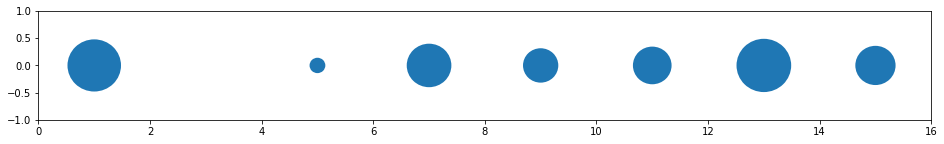

In [3]:
draw_circles(orig_hist)

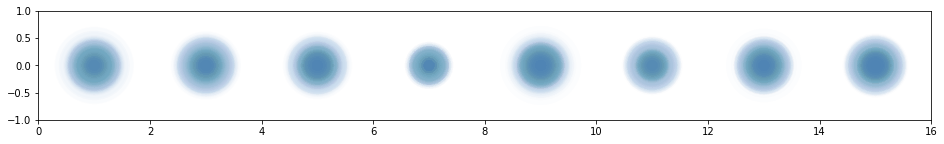

In [4]:
num_trials = 100
fig, ax = None, None
for _ in range(num_trials):
    noisy_result = run_random_circuit(N, D, shots,
                                      rand_x=True,
                                      in_r_param=r_params,
                                      in_m_param=m_params)
    noisy_hist = get_histogram_from_outcomes(noisy_result)
    fig, ax = draw_circles(noisy_hist, fig, ax, alpha=1/num_trials)
